William Andres Gomez Roa


# PUNTO 2: REGRESION LOGISTICA

In [4]:
if (!require('caret')) install.packages('caret')
if (!require('ROCR')) install.packages('ROCR')

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ROCR

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ROCR’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




In [71]:
if (!require('glmnet')) install.packages('glmnet')
library(glmnet)

Loading required package: glmnet

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘glmnet’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8



In [6]:
library(readxl)
library(dplyr)
library(caret)
library(ROCR)
library(ggplot2)

Loading required package: ggplot2

Loading required package: lattice



In [37]:
renunciar <-read_excel("RH_DataSet.xlsx")
renunciar$Renuncia <- as.factor(renunciar$Renuncia)
str(renunciar) # 1= se queda, 0 = RENUNCIA


tibble [1,000 × 11] (S3: tbl_df/tbl/data.frame)
 $ Porcentaje de retraso                                     : num [1:1000] 0.478 0.298 0.353 0.685 0.714 ...
 $ Porcentaje de iniciativa en proyectos                     : num [1:1000] 0.518 0.404 0.546 0.679 0.365 ...
 $ Porcentaje de entrega de proyectos a tiempo               : num [1:1000] 0.256 0.235 0.484 0.311 0.294 ...
 $ Porcentaje de correos electrónicos intercambiados         : num [1:1000] 0.447 0.491 0.51 0.491 0.392 ...
 $ Porcentaje de receptividad                                : num [1:1000] 0.349 0.456 0.908 0.62 0.687 ...
 $ Porcentaje de respuesta profesional a correos electrónicos: num [1:1000] 0.0642 0.2749 0.3264 0.4363 0.3142 ...
 $ Porcentaje de compartir ideas                             : num [1:1000] 0.328 0.268 0.939 0.786 0.578 ...
 $ Porcentaje de ayudar a compañeros                         : num [1:1000] 0.232 0.481 0.575 0.727 0.234 ...
 $ Porcentaje de publicaciones empresariales en LinkedIn     : num [1

In [38]:
# DATASET DE ENTRENAMIENTO Y DATASET DE PRUEBA
set.seed(1)

sample <- sample.int(nrow(renunciar), floor(.75*nrow(renunciar)))
renunciar.train <- renunciar[sample, ]
renunciar.test <- renunciar[-sample, ]

str(renunciar.train)


tibble [750 × 11] (S3: tbl_df/tbl/data.frame)
 $ Porcentaje de retraso                                     : num [1:750] 0.498 0.578 0.438 0.489 0.408 ...
 $ Porcentaje de iniciativa en proyectos                     : num [1:750] 0.473 0.434 0.385 0.288 0.718 ...
 $ Porcentaje de entrega de proyectos a tiempo               : num [1:750] 0.646 0.166 0.234 0.478 0.612 ...
 $ Porcentaje de correos electrónicos intercambiados         : num [1:750] 0.347 0.41 0.203 0.295 0.421 ...
 $ Porcentaje de receptividad                                : num [1:750] 0.86 0.321 0.301 0.425 0.627 ...
 $ Porcentaje de respuesta profesional a correos electrónicos: num [1:750] 0.633 0.361 0.358 0.717 0.883 ...
 $ Porcentaje de compartir ideas                             : num [1:750] 0.764 0.491 0.261 0.321 0.52 ...
 $ Porcentaje de ayudar a compañeros                         : num [1:750] 0.315 0.744 0.577 0.802 0.836 ...
 $ Porcentaje de publicaciones empresariales en LinkedIn     : num [1:750] 0.358 0.60

In [39]:
# MODELO STEP
##Modelo
set.seed(1)
modelo.logit<-glm(Renuncia~.,family=binomial,renunciar.train)
#trace=0 impide ver todos los detalles de la optimización stepwise
steplogit<-step(modelo.logit, direction="both")
summary(steplogit)

Start:  AIC=209.55
Renuncia ~ `Porcentaje de retraso` + `Porcentaje de iniciativa en proyectos` + 
    `Porcentaje de entrega de proyectos a tiempo` + `Porcentaje de correos electrónicos intercambiados` + 
    `Porcentaje de receptividad` + `Porcentaje de respuesta profesional a correos electrónicos` + 
    `Porcentaje de compartir ideas` + `Porcentaje de ayudar a compañeros` + 
    `Porcentaje de publicaciones empresariales en LinkedIn` + 
    `Porcentaje de comentarios en Facebook`

                                                               Df Deviance
- `Porcentaje de comentarios en Facebook`                       1   187.58
- `Porcentaje de correos electrónicos intercambiados`           1   187.87
<none>                                                              187.56
- `Porcentaje de compartir ideas`                               1   193.00
- `Porcentaje de receptividad`                                  1   193.82
- `Porcentaje de respuesta profesional a correos electrónico


Call:
glm(formula = Renuncia ~ `Porcentaje de retraso` + `Porcentaje de iniciativa en proyectos` + 
    `Porcentaje de entrega de proyectos a tiempo` + `Porcentaje de receptividad` + 
    `Porcentaje de respuesta profesional a correos electrónicos` + 
    `Porcentaje de compartir ideas` + `Porcentaje de ayudar a compañeros` + 
    `Porcentaje de publicaciones empresariales en LinkedIn`, 
    family = binomial, data = renunciar.train)

Coefficients:
                                                             Estimate
(Intercept)                                                     6.196
`Porcentaje de retraso`                                         7.113
`Porcentaje de iniciativa en proyectos`                        -6.728
`Porcentaje de entrega de proyectos a tiempo`                 -11.252
`Porcentaje de receptividad`                                   -2.575
`Porcentaje de respuesta profesional a correos electrónicos`   -3.204
`Porcentaje de compartir ideas`                         

In [40]:
#crea el pronostico base de entrenamiento
prontrain<-ifelse(steplogit$fitted.values > 0.5,1,0)
#tabla de confusión y estadisticas, base de entrenamiento
conftrain<-confusionMatrix(as.factor(prontrain),renunciar.train$Renuncia, positive = "1")
conftrain
conftrain$byClass

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 365  17
         1  16 352
                                          
               Accuracy : 0.956           
                 95% CI : (0.9388, 0.9695)
    No Information Rate : 0.508           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.912           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9539          
            Specificity : 0.9580          
         Pos Pred Value : 0.9565          
         Neg Pred Value : 0.9555          
             Prevalence : 0.4920          
         Detection Rate : 0.4693          
   Detection Prevalence : 0.4907          
      Balanced Accuracy : 0.9560          
                                          
       'Positive' Class : 1               
                              

Sensitivity          Specificity       Pos Pred Value 
           0.9539295            0.9580052            0.9565217 
      Neg Pred Value            Precision               Recall 
           0.9554974            0.9565217            0.9539295 
                  F1           Prevalence       Detection Rate 
           0.9552239            0.4920000            0.4693333 
Detection Prevalence    Balanced Accuracy 
           0.4906667            0.9559674

In [41]:
#crea el pronóstico en validación
probtest<-predict(steplogit,newdata = renunciar.test,type='response')
prontest<-ifelse(probtest > 0.5,1,0)
conftest<-confusionMatrix(as.factor(prontest),renunciar.test$Renuncia, positive = "1")
conftest
conftest$byClass

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 112   8
         1   7 123
                                        
               Accuracy : 0.94          
                 95% CI : (0.903, 0.966)
    No Information Rate : 0.524         
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.8798        
                                        
 Mcnemar's Test P-Value : 1             
                                        
            Sensitivity : 0.9389        
            Specificity : 0.9412        
         Pos Pred Value : 0.9462        
         Neg Pred Value : 0.9333        
             Prevalence : 0.5240        
         Detection Rate : 0.4920        
   Detection Prevalence : 0.5200        
      Balanced Accuracy : 0.9401        
                                        
       'Positive' Class : 1             
                                        

Sensitivity          Specificity       Pos Pred Value 
           0.9389313            0.9411765            0.9461538 
      Neg Pred Value            Precision               Recall 
           0.9333333            0.9461538            0.9389313 
                  F1           Prevalence       Detection Rate 
           0.9425287            0.5240000            0.4920000 
Detection Prevalence    Balanced Accuracy 
           0.5200000            0.9400539

## PRIMER PUNTO

## **¿De las variables presentes en el modelo final, si tuviera que eliminar una variable de las que quedaron en el modelo final, cuál eliminaría y porqué?**

Eliminaría `Porcentaje de receptividad` ya que en el modelo step presenta el mayor valor p. Indicando que esta variable es la menos significativa de todas

## SEGUNDO PUNTO

## **Tomando como probabilidad base la probabilidad de renuncia, determine la probabilidad final que se obtiene al mostrar un aumento de 3 puntos porcentuales (por ejemplo, subir de 10% a 15%) en la probabilidad de retraso, suponiendo que las demás variables no tienen ningún cambio.**

In [47]:
coeficientes<-steplogit$coefficients
odd_change<-exp(coeficientes)
odd_change_ver<-as.data.frame(odd_change)
odd_change_ver

,odd_change
,<dbl>
(Intercept),4.907924e+02
`Porcentaje de retraso`,1.227374e+03
`Porcentaje de iniciativa en proyectos`,1.196785e-03
`Porcentaje de entrega de proyectos a tiempo`,1.297797e-05
`Porcentaje de receptividad`,7.615719e-02
`Porcentaje de respuesta profesional a correos electrónicos`,4.059275e-02
`Porcentaje de compartir ideas`,7.836280e-02
`Porcentaje de ayudar a compañeros`,4.571075e-04
`Porcentaje de publicaciones empresariales en LinkedIn`,8.563923e+04


In [43]:
#Odd ratios
balance<-table(renunciar$Renuncia)
prop.table(balance)
oddbase<-prop.table(balance)[2]/prop.table(balance)[1]
oddbase


  0   1 
0.5 0.5 

1 
1

In [123]:
oddfin<-oddbase*odd_change
prob1step<-as.data.frame(oddfin/(1+oddfin))
View(prob1step)

,oddfin/(1 + oddfin)
,<dbl>
(Intercept),9.979666e-01
`Porcentaje de retraso`,9.991859e-01
`Porcentaje de iniciativa en proyectos`,1.195355e-03
`Porcentaje de entrega de proyectos a tiempo`,1.297781e-05
`Porcentaje de receptividad`,7.076772e-02
`Porcentaje de respuesta profesional a correos electrónicos`,3.900926e-02
`Porcentaje de compartir ideas`,7.266830e-02
`Porcentaje de ayudar a compañeros`,4.568986e-04
`Porcentaje de publicaciones empresariales en LinkedIn`,9.999883e-01


Al aumentar en una unidad el `Porcentaje de retraso` **AUMENTA** en un %99.91\%$. Es decir que el cambio porcentual de 3 unidades porcentuales sería del 3% aproximadamente. Ya que 1 unica unidad porcentual equivale a 99/100 ~ 1%.

## TERCER PUNTO

## **Se selecciona un grupo de 2000 personas para evaluar la implementación de la estrategia.  Se ha estimado que por cada persona categorizada correctamente se estima un ahorro promedio de $\$800$, mientras que por cada persona mal categorizada se estima un costo de $\$350$.  Basado en corte de 0.5, ¿cuál sería la ganancia esperada en términos monetarios para este modelo?**

In [55]:
TPR = conftest$table[2,2]/(conftest$table[2,2]+conftest$table[2,1])
TPR #true positive rate

gg=TPR*2000 #bien clasificadas
bb=2000-gg #mal clasificadas
gg
bb

pi= 800*gg - 350*bb
pi


[1] 0.9389313

[1] 0.9461538

[1] 1892.308

[1] 107.6923

[1] 1476154

Se espera un ahorro aproximado de $\$1.476.153,84$ dolares, ya que se ahorra $\$800$ por cada una de las 1892 personas bien clasificadas y se pierden $\$350$ por cada una de las 107 personas mal clasificadas.

## CUARTO PUNTO

## **Esta pregunta es conceptual:  Si hipotéticamente el cutoff se disminuyera a 0.3, ¿cómo afectaría el precision y el recall? ¿Afectaría este cambio el valor de AUC?  Justifique sus respuestas.**

En teoría si debería afectar, ya que vimos que la base de datos estaba bien balanceada y observando la grafica de cutoof vs ganancia se observa un comportamiento simetrico que sugiere un cutoof de 0.5. Al disminuir el cutoff a 0.3 se permite que menos personas de la clase 0 sean clasificadas y aumente la clasificaciond e las personas de la clase 1. Esto supone un impacto megativo en el indicador AUC.

In [114]:
#crear objeto de predicciones
pr<-prediction(probtest,renunciar.test$Renuncia)
#creacion del objeto de la curva
curvaROC<-performance(pr,measure="tpr",x.measure="fpr")

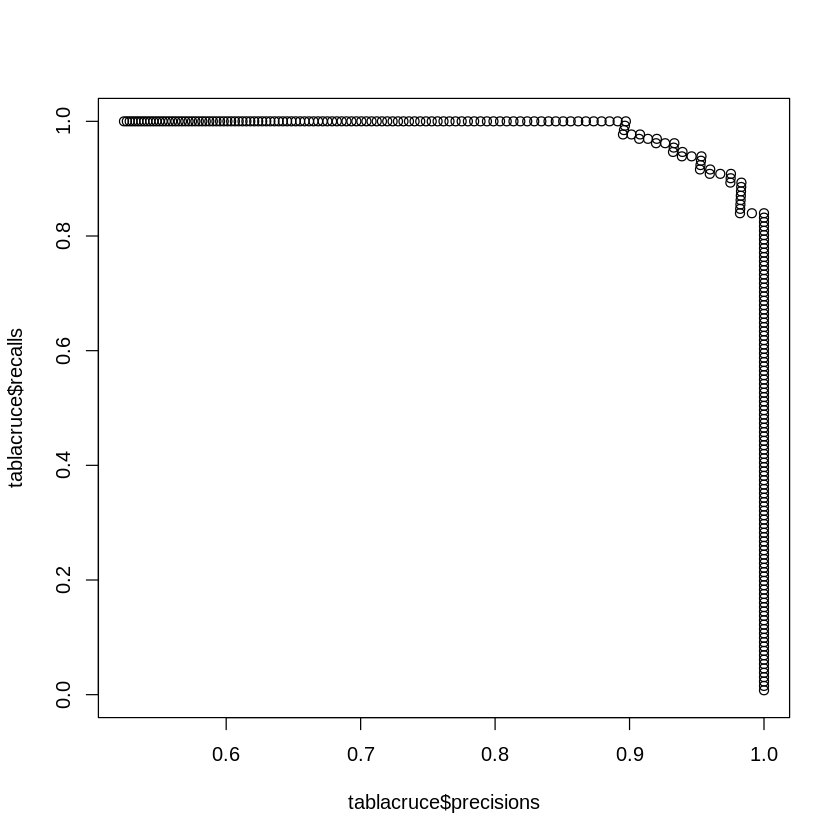

In [120]:
#guardar las exhaustividades y puntos de corte
tablafinan<-performance(pr,measure="rec")
cutoffs<-unlist(tablafinan@x.values)
recalls<-unlist(tablafinan@y.values)

#guardar las precisiones
tablafina2<-performance(pr,measure="prec")
precisions<-unlist(tablafina2@y.values)

#guardar f scores
tablafina3<-performance(pr,measure="auc")
AUC<-unlist(tablafina3@y.values)

#crear la tabla conjunta
tablacruce<-as.data.frame(cbind(cutoffs,precisions,recalls,AUC))

#ver precisiones versus exhaustividad
plot(tablacruce$precisions,tablacruce$recalls)

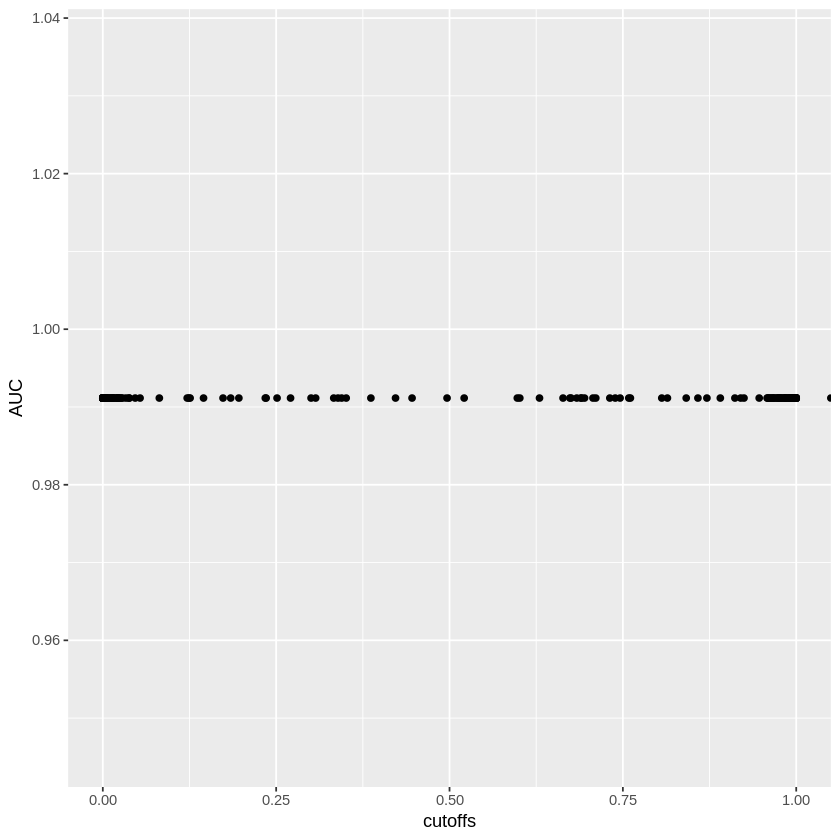

In [121]:
#ver el cutoff que maximiza AUC
ggplot(tablacruce, aes(cutoffs,AUC))+geom_point()

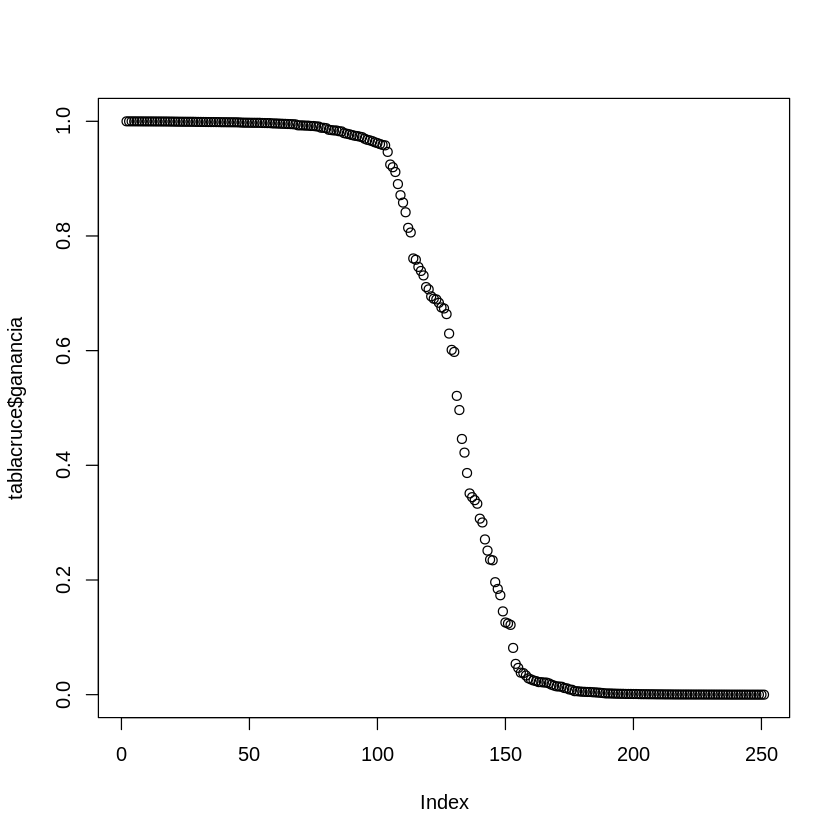

In [122]:
#pintar las ganancias versus los cutoffs
plot(tablacruce$cutoffs,tablacruce$ganancia)

## QUINTO PUNTO

## **Con el fin de mejorar el desempeño del modelo actual, desarrolle un modelo ELASTIC NET, escogiendo adecuadamente los parámetros alfa y lambda que conduzcan al mejor desempeño posible.  ¿Cómo lo compra con el modelo sin regularización?**

In [76]:
x <- renunciar.train[,c(1,2,3,4,5,6,7,8,9,10)]
y <- renunciar.train$Renuncia


In [80]:
# Dumy code categorical predictor variables
x <- model.matrix(Renuncia~., renunciar.train)

# Convert the outcome (class) to a numerical variable
y <- ifelse(renunciar.train$Renuncia == "1", 1, 0)

In [81]:
# Redes elasticas de 0.1 a 0.9

for (i in 1:9){
  assign(paste("found", i, sep=""), cv.glmnet(x, y, nfolds=5, alpha=i/10, family = "binomial"))}

In [87]:
min(found1$cvm)
min(found2$cvm)
min(found3$cvm)
min(found4$cvm)
min(found5$cvm)
min(found6$cvm)
min(found7$cvm)
min(found8$cvm)
min(found9$cvm)


[1] 0.2812539

[1] 0.2779132

[1] 0.2731369

[1] 0.2941379

[1] 0.2945552

[1] 0.2774624

[1] 0.2854891

[1] 0.2789896

[1] 0.2872527

In [88]:
min(found3$cvm)

[1] 0.2731369

In [110]:
elastic3 <- glmnet(x, y, alpha = 0.5, family = "binomial")
coef(elastic3, s=found3$lambda.1se)

12 x 1 sparse Matrix of class "dgCMatrix"
                                                                    s1
(Intercept)                                                   3.223153
(Intercept)                                                   .       
`Porcentaje de retraso`                                       4.319796
`Porcentaje de iniciativa en proyectos`                      -3.848897
`Porcentaje de entrega de proyectos a tiempo`                -6.361297
`Porcentaje de correos electrónicos intercambiados`           .       
`Porcentaje de receptividad`                                 -1.203900
`Porcentaje de respuesta profesional a correos electrónicos` -1.759528
`Porcentaje de compartir ideas`                              -1.176037
`Porcentaje de ayudar a compañeros`                          -4.583573
`Porcentaje de publicaciones empresariales en LinkedIn`       6.523748
`Porcentaje de comentarios en Facebook`                       .       

In [112]:
# Final elastic net model with lambda.min
elastic3 <- glmnet(x, y, alpha = 0.5, family = "binomial",
                      lambda = found3$lambda.1se)

# Make prediction on TRAIN
x.train <-model.matrix(Renuncia~., renunciar.train)

probabilities <- elastic3 %>% predict(newx = x.train)
predicted.classes <- ifelse(probabilities > 0.5, "1", "0")
# Model accuracy
observed.classes <- renunciar.train$Renuncia
print("ENTRENAMIENTO")
conftest<- confusionMatrix(as.factor(predicted.classes),observed.classes)
print(confusionMatrix(as.factor(predicted.classes),observed.classes))
conftest$byClass

# Make prediction on TEST
x.test <-model.matrix(Renuncia~., renunciar.test)

probabilities <- elastic3 %>% predict(newx = x.test)
predicted.classes <- ifelse(probabilities > 0.5, "1", "0")
# Model accuracy
observed.classes <- renunciar.test$Renuncia
print("PRUEBA")
conftest<- confusionMatrix(as.factor(predicted.classes),observed.classes)
print(confusionMatrix(as.factor(predicted.classes),observed.classes))
conftest$byClass

[1] "ENTRENAMIENTO"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 369  25
         1  12 344
                                         
               Accuracy : 0.9507         
                 95% CI : (0.9326, 0.965)
    No Information Rate : 0.508          
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.9013         
                                         
 Mcnemar's Test P-Value : 0.04852        
                                         
            Sensitivity : 0.9685         
            Specificity : 0.9322         
         Pos Pred Value : 0.9365         
         Neg Pred Value : 0.9663         
             Prevalence : 0.5080         
         Detection Rate : 0.4920         
   Detection Prevalence : 0.5253         
      Balanced Accuracy : 0.9504         
                                         
       'Positive' Class : 0              
                              

Sensitivity          Specificity       Pos Pred Value 
           0.9685039            0.9322493            0.9365482 
      Neg Pred Value            Precision               Recall 
           0.9662921            0.9365482            0.9685039 
                  F1           Prevalence       Detection Rate 
           0.9522581            0.5080000            0.4920000 
Detection Prevalence    Balanced Accuracy 
           0.5253333            0.9503766

[1] "PRUEBA"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 117  13
         1   2 118
                                        
               Accuracy : 0.94          
                 95% CI : (0.903, 0.966)
    No Information Rate : 0.524         
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.8802        
                                        
 Mcnemar's Test P-Value : 0.009823      
                                        
            Sensitivity : 0.9832        
            Specificity : 0.9008        
         Pos Pred Value : 0.9000        
         Neg Pred Value : 0.9833        
             Prevalence : 0.4760        
         Detection Rate : 0.4680        
   Detection Prevalence : 0.5200        
      Balanced Accuracy : 0.9420        
                                        
       'Positive' Class : 0             
                                        


Sensitivity          Specificity       Pos Pred Value 
           0.9831933            0.9007634            0.9000000 
      Neg Pred Value            Precision               Recall 
           0.9833333            0.9000000            0.9831933 
                  F1           Prevalence       Detection Rate 
           0.9397590            0.4760000            0.4680000 
Detection Prevalence    Balanced Accuracy 
           0.5200000            0.9419783

Una vez realizado el modelo con regularización anterior, el más adecuado se obtuvo con `lambda = found3$lambda.1se` y `alpha = 0.5`. Para encontrar alpha evalué el codigo anterior con valores entre [0-1] manualmente, hasta llegar a 0.5.

Finalmente, comparando el modelo con el que no tenía regularización este es bastante mejor para detectar Los True Negatives pero disminuye su tasa para detectar los True Positives levemente. Los True Negatives pasaron de 112 a 117 y los True Positives bajaron de 123 a 118.

Adicionalmente el Acuuracy en entrenamiento bajo un poco y en prueba se mantuvo en 0.94, indicando que si hubo un efecto para evitar el sobreajuste de los datos de entrenamiento.

Sin emabrgo, considero que ambos modelos son igualmente adecuados ya que en promedio la tasa de verdaderos calsificados se mantienen aproximadamente igual.